# Import a Dataset to analyse it

We want to import a Dataset to analyse the outputs of the previous Si DOS-BS calculations. We could have also analysed it directly in the previous notebook, but this is useful to show how to import an existing Dataset without creating it from scratch.

In [1]:
# import packages
from pynter.data.datasets import Dataset

Now we import the dataset of the Si DOS-BS calculation. 

In [2]:
import os
homedir = os.getenv('HOME')
ds = Dataset.from_directory(os.path.join(homedir,'local-data/tutorials/Si-BS-dataset'))
print(ds)

                   formula      group nodes  is_converged
job_name                                                 
Si-BS_PBE-el-str_1     Si2  1-PBE-SCF                True
Si-BS_PBE-el-str_2     Si2  2-PBE-DOS                True
Si-BS_PBE-el-str_3     Si2   3-PBE-BS                True


In [3]:
# check jobs in dataset adding total energy and charge to displayed properties
ds.jobs_table(display=['final_energy'])

,formula,group,nodes,is_converged,final_energy
job_name,,,,,
Si-BS_PBE-el-str_1,Si2,1-PBE-SCF,,True,-10.840906
Si-BS_PBE-el-str_2,Si2,2-PBE-DOS,,True,-10.844797
Si-BS_PBE-el-str_3,Si2,3-PBE-BS,,True,-11.002882


In [4]:
job_dos = ds.select_jobs(groups=['2-PBE-DOS'])[0]
job_bs = ds.select_jobs(groups=['3-PBE-BS'])[0]
job_dos.get_output_properties(data=['complete_dos'])
dos = job_dos.complete_dos
job_bs.get_output_properties(get_band_structure=True)
bs = job_bs.band_structure

Now let's plot the bandstructure. We can use the methods in the `vasp.plotter` module. The `plot_dos_bs` method uses the `pymatgen` DOS and BS plotters.

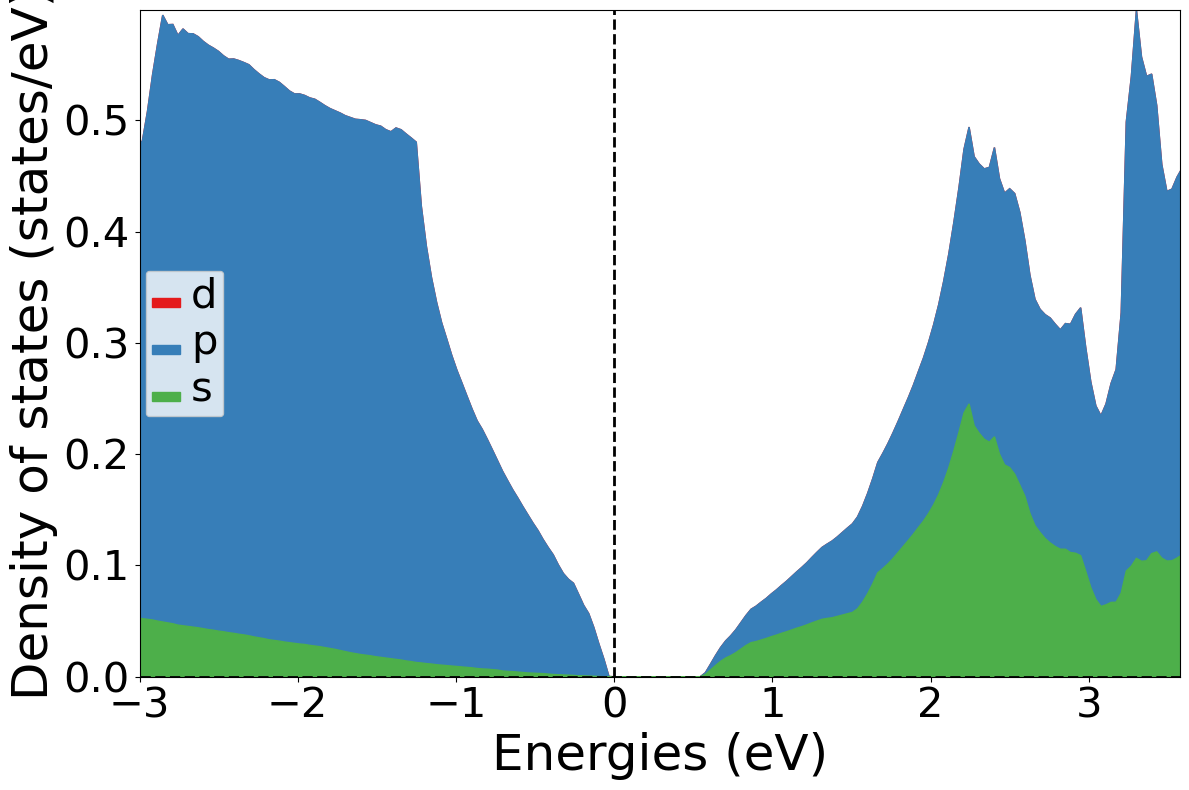

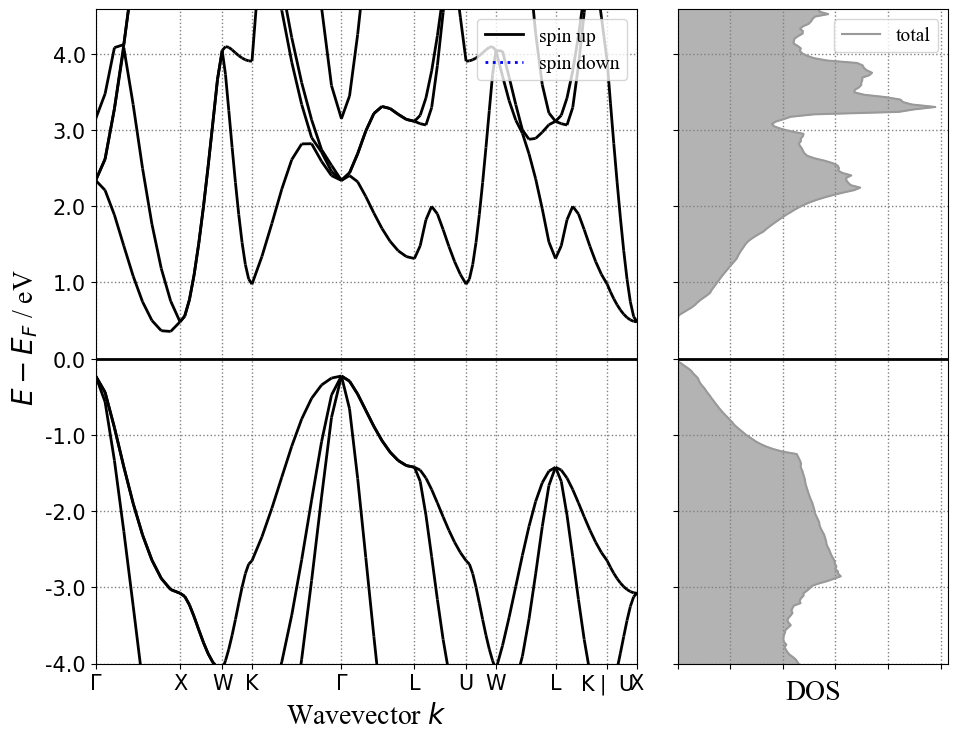

In [5]:
import warnings
from pynter.vasp.plotter import plot_dos_bs, plot_spd_dos

warnings.filterwarnings('ignore')
plot_spd_dos(dos,stack=True)
plot_dos_bs(dos,bs).show()